In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis
import matplotlib.cm as cm


In [4]:
# Cell 2: Load and clean data
file_path = "heart_disease_patients.csv"
df = pd.read_csv(file_path)
df_cleaned = df.drop(columns=["id"])
df_original = df_cleaned.copy()


In [5]:
# Cell 3: Normalize features for clustering
scaler = StandardScaler()
features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_scaled = df_cleaned.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])


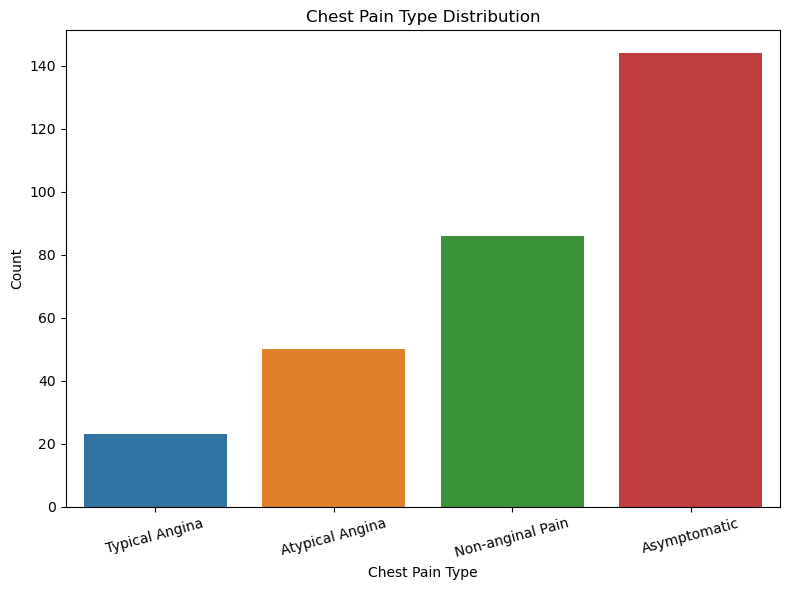

In [11]:
# Cell 4: Categorical plot function with descriptive x-axis labels
def plot_categorical_cp(df):
    """
    Creates a bar plot for chest pain type (cp) with descriptive labels.
    """
    # Mapping chest pain types to readable labels
    chest_pain_labels = {
        1: 'Typical Angina',
        2: 'Atypical Angina',
        3: 'Non-anginal Pain',
        4: 'Asymptomatic'
    }
    df = df.copy()
    df['cp'] = df['cp'].map(chest_pain_labels)

    plt.figure(figsize=(8, 6))
    sns.countplot(x='cp', data=df, order=list(chest_pain_labels.values()))
    plt.title('Chest Pain Type Distribution')
    plt.xlabel('Chest Pain Type')
    plt.ylabel('Count')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.savefig("plot_categorical_cp.png")
    plt.show()
    plt.close()

# Run the updated function
plot_categorical_cp(df_cleaned)


In [28]:
# Statistical summary with major moments
def generate_statistical_summary(df, features):
    """
    Prints and returns a statistical summary including mean, median, std, skewness, and kurtosis.
    """
    summary = pd.DataFrame(index=features)
    summary["Mean"] = df[features].mean()
    summary["Median"] = df[features].median()
    summary["Std Dev"] = df[features].std()
    summary["Skewness"] = df[features].skew()
    summary["Kurtosis"] = df[features].kurt()

    return summary

# Generate and display the summary
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
stat_summary = generate_statistical_summary(df_cleaned, selected_columns)
stat_summary


,Mean,Median,Std Dev,Skewness,Kurtosis
age,54.438944,56.0,9.038662,-0.209060,-0.523383
trestbps,131.689769,130.0,17.599748,0.706035,0.880074
chol,246.693069,241.0,51.776918,1.135503,4.491724
thalach,149.607261,153.0,22.875003,-0.537449,-0.053541
oldpeak,1.039604,0.8,1.161075,1.269720,1.575813


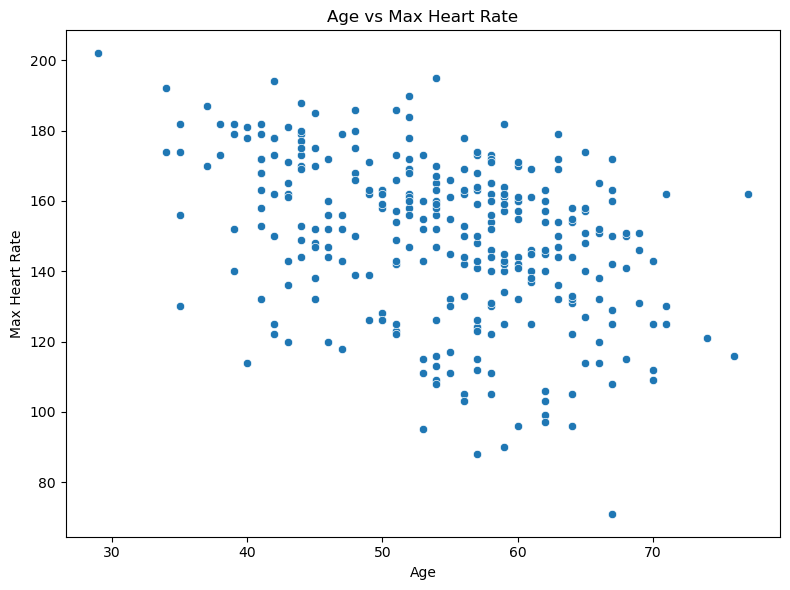

In [14]:
# Cell 5: Relational plot function
def plot_relational_age_thalach(df):
    """
    Creates a scatter plot of age vs max heart rate (thalach).
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='age', y='thalach', data=df)
    plt.title('Age vs Max Heart Rate')
    plt.xlabel('Age')
    plt.ylabel('Max Heart Rate')
    plt.tight_layout()
    plt.show()
    plt.savefig("plot_relational_age_thalach.png")
    plt.close()

plot_relational_age_thalach(df_cleaned)


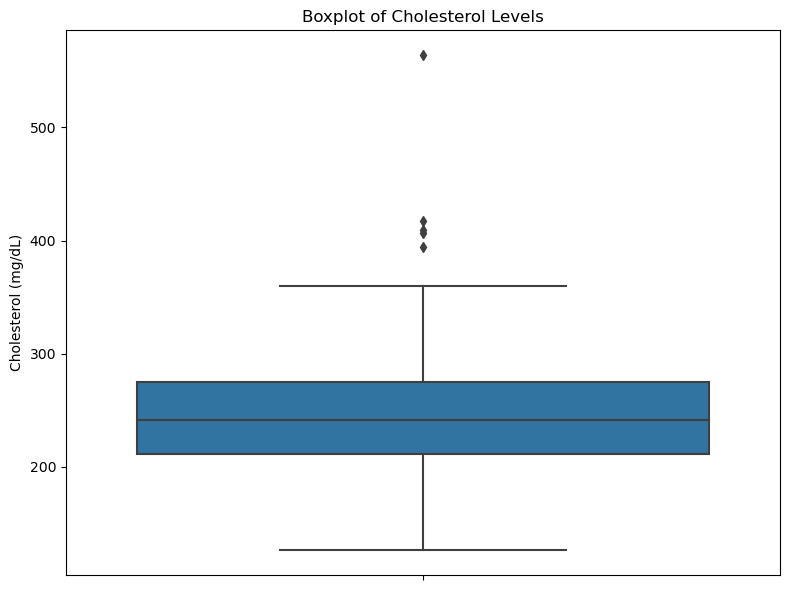

In [15]:
# Cell 6: Statistical box plot function
def plot_statistical_box_chol(df):
    """
    Creates a boxplot for cholesterol levels.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(y='chol', data=df)
    plt.title('Boxplot of Cholesterol Levels')
    plt.ylabel('Cholesterol (mg/dL)')
    plt.tight_layout()
    plt.show()
    plt.savefig("plot_statistical_box_chol.png")
    plt.close()

plot_statistical_box_chol(df_cleaned)


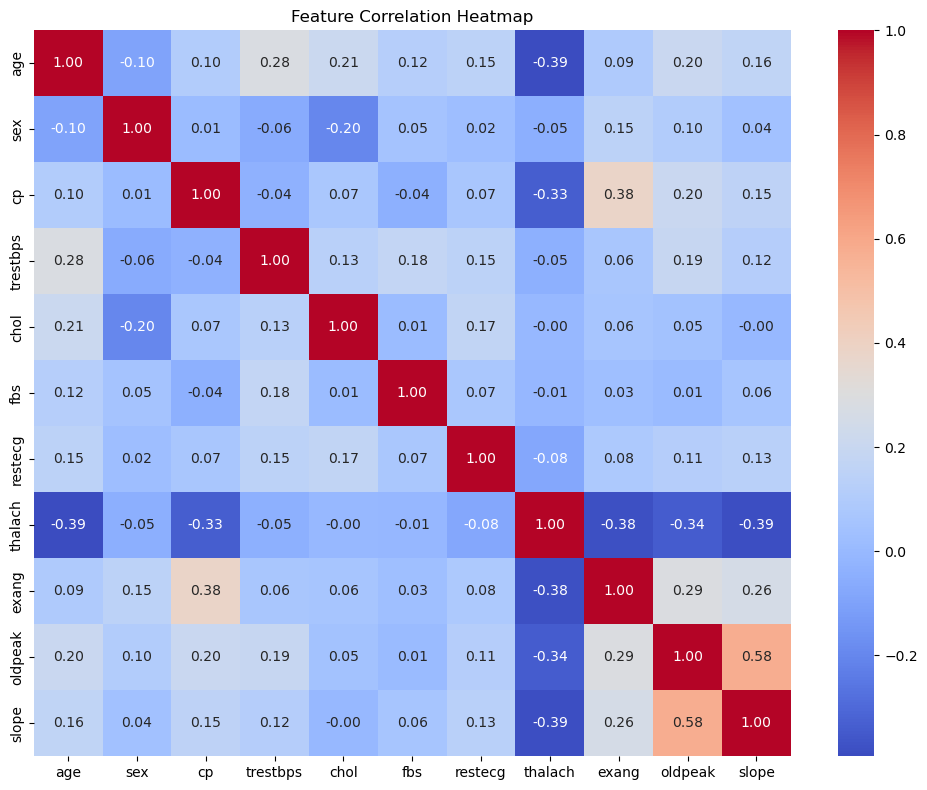

In [16]:
# Cell 7: Correlation heatmap function
def plot_correlation_heatmap(df):
    """
    Creates a heatmap of correlation matrix.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    plt.savefig("plot_statistical_heatmap_corr.png")
    plt.close()

plot_correlation_heatmap(df_cleaned)


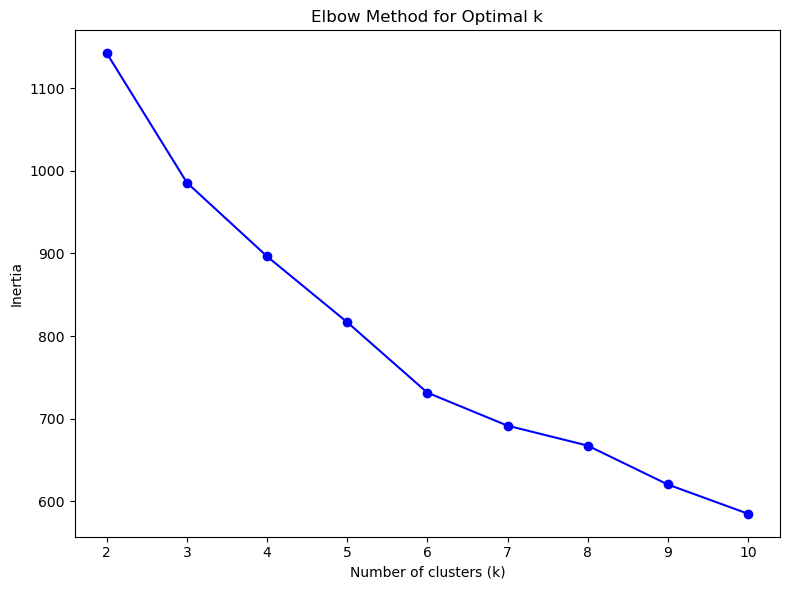

In [20]:
import warnings
warnings.filterwarnings('ignore')
# Cell 8: Elbow plot function for KMeans
def elbow_plot(data, max_k=10):
    """
    Plots the elbow curve to determine optimal number of clusters.
    """
    distortions = []
    K = range(2, max_k+1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.tight_layout()
    plt.show()
    plt.savefig('elbow_plot.png')
    plt.close()

X = df_scaled[features_to_scale]
elbow_plot(X)


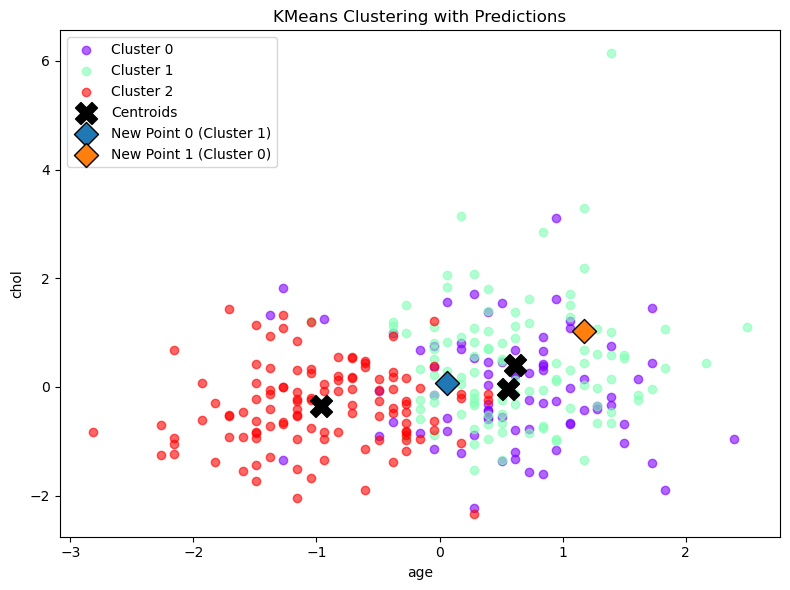

In [23]:
# Cell 10: Final cluster plot with prediction points
def kmeans_cluster_plot(data, n_clusters=3):
    """
    Performs KMeans clustering, plots clusters and centroids, and predicts new points.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    centroids = kmeans.cluster_centers_

    x_idx, y_idx = 0, 2  # age vs chol
    x_feature, y_feature = features_to_scale[x_idx], features_to_scale[y_idx]

    plt.figure(figsize=(8, 6))
    colors = cm.rainbow(np.linspace(0, 1, n_clusters))
    for i in range(n_clusters):
        cluster = data[labels == i]
        plt.scatter(cluster.iloc[:, x_idx], cluster.iloc[:, y_idx], label=f'Cluster {i}', alpha=0.6, color=colors[i])

    plt.scatter(centroids[:, x_idx], centroids[:, y_idx], s=250, marker='X', c='black', label='Centroids')

    new_points = pd.DataFrame({
        'age': [55, 65],
        'trestbps': [130, 145],
        'chol': [250, 300],
        'thalach': [160, 140],
        'oldpeak': [1.0, 2.5]
    })
    new_scaled = scaler.transform(new_points)
    new_labels = kmeans.predict(new_scaled)
    new_scaled_df = pd.DataFrame(new_scaled, columns=features_to_scale)

    for i, row in new_scaled_df.iterrows():
        plt.scatter(row[x_feature], row[y_feature], s=150, marker='D', edgecolors='black',
                    label=f'New Point {i} (Cluster {new_labels[i]})')

    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title('KMeans Clustering with Predictions')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.savefig('kmeans_cluster_plot.png')
    plt.close()

kmeans_cluster_plot(X, n_clusters=3)


In [24]:
# Cell 11: Fit regression model (functional approach)
def fit_regression_model(input_df, feature_col, target_col):
    """
    Fits a linear regression model and returns the model and data used.
    """
    X = input_df[[feature_col]].values
    y = input_df[target_col].values
    model = LinearRegression()
    model.fit(X, y)
    return model, X, y

reg_model, age_vals, heart_rate_vals = fit_regression_model(df_cleaned, 'age', 'thalach')


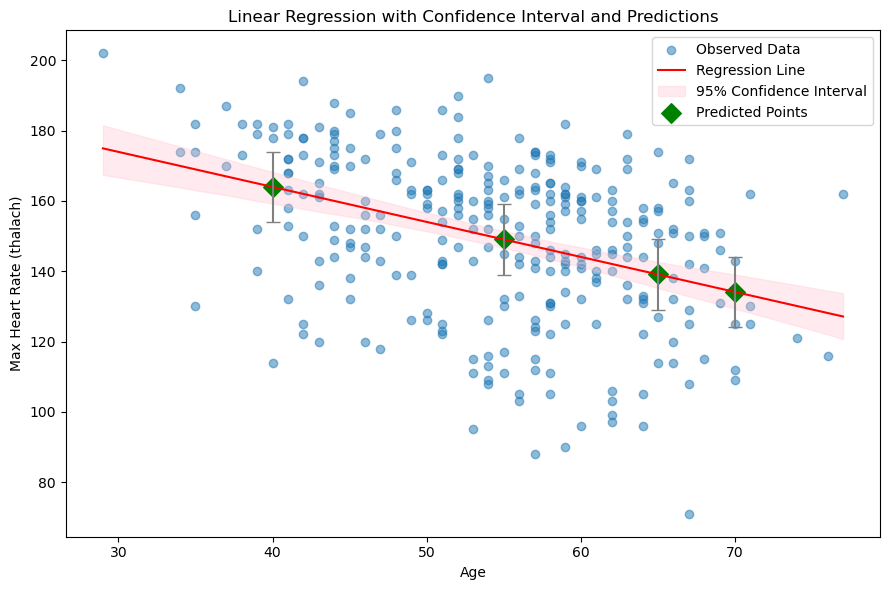

In [27]:
# Cell 13: regression plot with confidence interval and prediction uncertainties
from sklearn.utils import resample

def plot_regression_with_uncertainty(model, X, y, prediction_ages):
    """
    Plots linear regression with 95% confidence interval and prediction points with uncertainties.
    """
    X_sorted = np.sort(X, axis=0)
    y_pred = model.predict(X_sorted)

    # Bootstrap to estimate confidence interval
    y_boot_preds = []
    for _ in range(1000):
        X_sample, y_sample = resample(X, y)
        model_sample = LinearRegression().fit(X_sample, y_sample)
        y_boot_preds.append(model_sample.predict(X_sorted))

    y_boot_preds = np.array(y_boot_preds)
    lower_bound = np.percentile(y_boot_preds, 2.5, axis=0)
    upper_bound = np.percentile(y_boot_preds, 97.5, axis=0)

    # Start plotting
    plt.figure(figsize=(9, 6))
    plt.scatter(X, y, alpha=0.5, label='Observed Data')
    plt.plot(X_sorted, y_pred, color='red', label='Regression Line')
    plt.fill_between(X_sorted.flatten(), lower_bound, upper_bound, color='pink', alpha=0.3, label='95% Confidence Interval')

    # Predictions on new ages
    new_X = np.array(prediction_ages).reshape(-1, 1)
    new_y_pred = model.predict(new_X)
    plt.scatter(new_X, new_y_pred, color='green', marker='D', s=100, label='Predicted Points')
    plt.errorbar(new_X.flatten(), new_y_pred, yerr=10, fmt='none', ecolor='gray', capsize=5)

    # Labels and legend
    plt.xlabel('Age')
    plt.ylabel('Max Heart Rate (thalach)')
    plt.title('Linear Regression with Confidence Interval and Predictions')
    plt.legend()
    plt.tight_layout()
    plt.savefig("regression_plot_with_uncertainty.png")
    plt.show()
    plt.close()

# Run updated function
plot_regression_with_uncertainty(reg_model, age_vals, heart_rate_vals, prediction_ages=[40, 55, 65, 70])
